# Exploratory Data Analysis

In this notebook we will explore the data and try to understand the data better.

**Importing Libraries**

In [16]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

**Loading Data**

In [17]:
# Load the data
data = pd.read_csv('../data/train.csv')
data.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


## EDA on Category Features

In [18]:
# Summary statistics for the 'category' feature
category_summary = data['category'].describe()
print(category_summary)

count                      93686
unique                        15
top       Online Financial Fraud
freq                       57434
Name: category, dtype: object


Let's start with analysis of Category feature.

In [19]:
# Distribution of Category
fig = px.bar(data['category'].value_counts().reset_index(),
             x='category',
             y='count',
             text='count',
             color='category',
             labels={'category': 'Category', 'count': 'Count'},
             title='Category Distribution')

fig.update_traces(textposition='outside')
fig.update_layout(width=1000, height=800)

# Show the plot
fig.show()

Pie Chart for Category Distribution

In [20]:
# Pie Chart for Category Distribution
fig = px.pie(data['category'].value_counts().reset_index(),
             names='category',
             values='count',
             color='category',
             labels={'category': 'Category', 'count': 'Count'},
             title='Category Distribution')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(width=1000, height=800)

# Show the plot
fig.show()

**Word Cloud for Category**

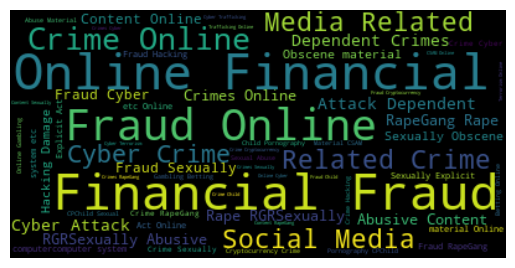

In [21]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(' '.join(data['category']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Conclusion

After the analysis on the 'category' feature, we can conclude that:
- The dataset is imbalanced.
- The distribution of the category is not uniform.
- The category 'Online Financial Fraud' has the highest frequency.
- Total number of categories are 15.